In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

import missingno
from scipy import stats
from sklearn.model_selection import train_test_split


In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [16]:
print(train_data.shape, test_data.shape)

(116058, 29) (35866, 28)


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

In [6]:
data_all = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [7]:
data_all.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1.0
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1.0


In [8]:
data_all.drop(['loan_id', 'source', 'financial_institution'], axis=1)

,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0
5,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
7,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
8,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1.0
9,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1.0


In [8]:
data_all['loan_purpose'].value_counts()

A23    76354
B12    38580
C86    36990
Name: loan_purpose, dtype: int64

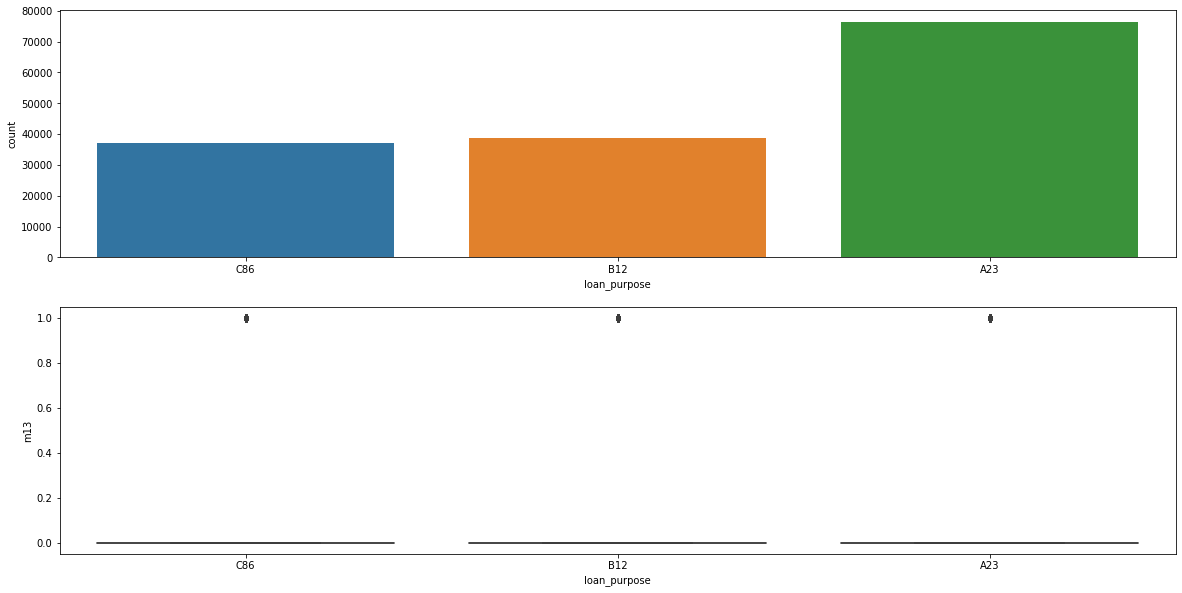

In [9]:
fig= plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,1,1)
sns.countplot(data=data_all, x="loan_purpose", ax=ax1);
ax2=fig.add_subplot(2,1,2)
sns.boxplot(data=data_all, x= "loan_purpose", y="m13", ax=ax2);

In [10]:
data_all['interest_rate'].value_counts()

3.875    27645
4.000    18788
3.250    12702
3.750    10905
4.125    10505
4.250     9848
4.375     9232
3.375     8442
4.500     5984
3.500     5719
3.990     3989
3.125     3921
3.625     3876
3.000     3626
4.625     2574
4.750     1893
2.875     1876
4.875     1581
5.000      635
2.750      477
2.990      403
5.125      376
5.250      338
3.950      256
5.375      244
3.850      189
4.990      173
3.100      154
4.490      149
3.900      132
         ...  
3.195        1
3.405        1
4.387        1
4.927        1
2.910        1
3.626        1
3.281        1
4.388        1
3.515        1
4.473        1
4.517        1
3.455        1
3.426        1
3.505        1
4.072        1
3.731        1
4.110        1
4.253        1
5.690        1
3.493        1
4.332        1
4.502        1
3.624        1
4.986        1
3.635        1
3.605        1
3.267        1
5.470        1
3.393        1
3.333        1
Name: interest_rate, Length: 1121, dtype: int64

In [15]:
data_all['interest_rate'].describe()

count    151924.000000
mean          3.869879
std           0.460908
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

In [16]:
data_all['unpaid_principal_bal'].describe()

count    1.519240e+05
mean     2.081173e+05
std      1.146558e+05
min      1.100000e+04
25%      1.200000e+05
50%      1.820000e+05
75%      2.780000e+05
max      1.200000e+06
Name: unpaid_principal_bal, dtype: float64

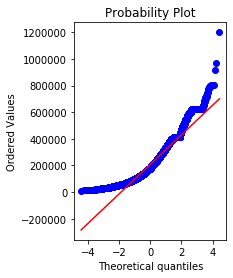

In [19]:
fig=plt.figure()
fig.add_subplot(1,2,1)
res=stats.probplot(data_all['unpaid_principal_bal'], plot=plt);

In [11]:
data_all['loan_term'].value_counts()

360    94127
180    37330
120     9158
240     8879
300     1194
96       226
156      124
144      104
336       92
324       59
168       51
348       42
108       39
276       29
312       27
84        26
132       24
121       22
288       19
216       19
264       16
150       12
228       11
166        9
162        8
60         8
153        7
354        7
352        7
165        6
       ...  
335        1
314        1
322        1
310        1
309        1
308        1
307        1
178        1
177        1
304        1
303        1
76         1
172        1
77         1
296        1
347        1
81         1
295        1
167        1
82         1
83         1
85         1
290        1
86         1
88         1
89         1
91         1
319        1
219        1
130        1
Name: loan_term, Length: 149, dtype: int64

In [12]:
data_all['loan_term'].describe()

count    151924.000000
mean        292.481458
std          89.653613
min          60.000000
25%         180.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: loan_term, dtype: float64

Text(0.5, 1.0, 'Unpaid principal bal')

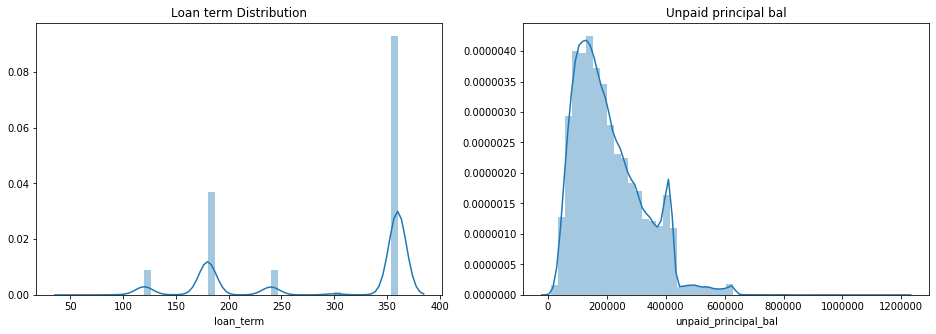

In [13]:
fig, ax=plt.subplots(1,2, figsize=(16,5))
sns.distplot(data_all['loan_term'], ax=ax[0]);
ax[0].set_title("Loan term Distribution")
sns.distplot(data_all["unpaid_principal_bal"], ax=ax[1]);
ax[1].set_title("Unpaid principal bal")

In [14]:
data_all['loan_to_value'].describe()

count    151924.000000
mean         67.421645
std          17.281065
min           5.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

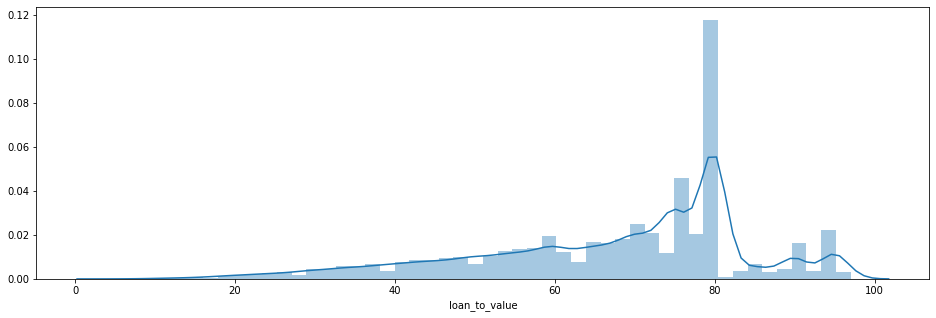

In [25]:
fig=plt.figure(figsize=(16,5))
ax1=fig.add_subplot(1,1,1)
sns.distplot(data_all['loan_to_value'], ax=ax1);

In [26]:
data_all.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.519240e+05,151924.000000,1.519240e+05,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,116058.000000
mean,4.197103e+11,3.869879,2.081173e+05,292.481458,67.421645,1.594040,30.747150,769.926713,2.772860,460.278514,0.003238,0.003113,0.002119,0.001968,0.002139,0.003337,0.003173,0.003976,0.004555,0.005114,0.006365,0.006885,0.007892,0.005480
std,3.255504e+11,0.460908,1.146558e+05,89.653613,17.281065,0.491078,9.729672,42.109207,8.080634,381.798443,0.056815,0.062714,0.053283,0.055763,0.061484,0.080205,0.083153,0.097749,0.108693,0.122103,0.142497,0.158087,0.174150,0.073824
min,1.000000e+00,2.250000,1.100000e+04,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.158882e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103649e+11,3.875000,1.820000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,741.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.040456e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [21]:
data_all.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [74]:
train_values=data_all.iloc[:116058, :]
test_values=data_all.iloc[116058:, :-1]

In [75]:
train_values.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0


In [76]:
test_values.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
116058,3.875,417000,360,75,1.0,20.0,790.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
116059,4.500,113000,360,80,2.0,33.0,793.0,0.0,784.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
116060,4.500,72000,360,75,1.0,34.0,710.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
116061,4.125,123000,180,41,2.0,24.0,798.0,0.0,813.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
116062,3.250,166000,180,53,2.0,12.0,767.0,0.0,768.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
y=train_values['m13']
X=train_values.drop(['m13'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size =0.7,
                                                   test_size = 0.3,
                                                   random_state = 1)


In [27]:
X_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
111243,4.375,173000,240,59,2.0,34.0,790.0,0.0,771.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
54861,3.875,191000,360,78,1.0,42.0,720.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
470,4.125,192000,360,88,1.0,44.0,711.0,25.0,0.0,0.0,0,0,0,1,1,1,1,1,1,1,0,0
37808,3.125,140000,180,38,2.0,25.0,742.0,0.0,706.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
74205,4.875,152000,360,74,2.0,32.0,766.0,0.0,771.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
class MyClassifier(BaseEstimator):
    
    def __init__(self, estimator = DecisionTreeClassifier()):
        """
        A custom BaseEstimator that can switch between classifiers.
        :param classifier_type: string - the switch for different calssifiers.
        """
        self.estimator = estimator
        
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X,y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

pipeline = Pipeline([
    ('clf', MyClassifier())
])
parameters = [
    {
        'clf__estimator' : [DecisionTreeClassifier()],                                                               
    },
    {
        'clf__estimator' : [GradientBoostingClassifier()],        
    },
    {
        'clf__estimator' : [xgb.XGBClassifier()],        
    },
    {
        'clf__estimator' : [lgb.LGBMClassifier()],        
    },
    
] 
gscv = GridSearchCV(pipeline,parameters, cv=5, n_jobs = 12, return_train_score=False, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  20 | elapsed:   37.0s remaining:  2.5min
[Parallel(n_jobs=12)]: Done  11 out of  20 | elapsed:  3.6min remaining:  2.9min
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:  3.8min remaining:   25.6s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        MyClassifier(estimator=DecisionTreeClassifier(class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
   

In [47]:
print('Best model:\n', gscv.best_params_)

Best model:
 {'clf__estimator': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)}


In [49]:

xgb_model = xgb.XGBClassifier(base_score=0.5,
                          booster='gbtree', 
                          colsample_bylevel=1,                          
                          colsample_bynode=1,
                          colsample_bytree=1,
                          gamma=0,
                          learning_rate=0.1,
                          max_delta_step=0, 
                          max_depth=3,
                          min_child_weight=1,
                          missing=None,
                          n_estimators=100,
                          n_jobs=1,
                          nthread=None,
                          objective='binary:logistic', 
                          random_state=0,                          
                          reg_alpha=0,
                          reg_lambda=1, 
                          scale_pos_weight=1, 
                          seed=None,
                          silent=None,
                          subsample=1, 
                          verbosity=1)

In [ ]:
test_data.drop([])

In [51]:
model_fit= xgb_model.fit(X_train,y_train)
preds = model_fit.predict_proba(X_test)
print("model score:{:.3f} ".format(xgb_model.score(X_test,y_test)))

model score:0.995 


In [78]:
sub = pd.DataFrame()
sub['loan_id'] = test_data['loan_id']
sub['m13']=xgb_model.predict(test_values)
sub.to_csv('xgb_submission.csv', index=False)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
f1_scores = cross_val_score(xgb_model,X_test, y_test, cv=5, scoring="f1")
print("F1 score: {}", f1_scores, "\nMean f1 score:{}", np.mean(f1_scores) )

F1 score: {} [0.33333333 0.38596491 0.4137931  0.38461538 0.22222222] 
Mean f1 score:{} 0.3479857911799836
